In [7]:
import pandas as pd
import MyLib.nlp as nlp
import MyLib.HTML_prep as HTML_prep
import MyLib.analysis as analysis 
import MyLib.hype as hype 
from ipywidgets import interactive, interact

%load_ext autoreload
%autoreload 2

In [421]:
df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")
print(len(df))

df_publ=df.drop_duplicates(subset="FileKey")[["date","FileKey"]]
df_publ=df_publ.set_index("date").groupby(pd.Grouper(freq=freq)).count()
df_publ.columns=["Publications"]

1622


In [420]:
Counts

,publications,sentences
Uni,,
Delft University,22,97
Eindhoven University of Technoloy,27,202
Leiden University,40,123
Maastricht Univerisity,26,159
OpenUniversiteitNederland,12,32
Radboud Nijmegen,28,99
Rotterdam University,29,141
Tilburg University,12,63
University of Amsterdam,24,109


In [666]:
ChatGPT_Terms="ChatGPT, GPT3, GPT4, OpenAI, AI, LLM, A.I, GPT, Chatbot, technology, tool, app, Artificial Intelligence, Large Language Models"


In [363]:


df["text_clean_f"]=df.text_clean.apply(nlp.filter_paragraphs,by=Promise_terms)
#df.text_clean_f.to_list()

In [364]:
df["NoStopwords_Set"]=df.NoStopwords.apply(lambda x: list(set(x)))
Lists=df.NoStopwords_Set.to_list()


In [365]:
Lists=df.NoStopwords.to_list()

Lists=[i for i in Lists if i!=None]
Words=[item for sublist in Lists for item in sublist]

from collections import Counter
a_counter = Counter(Words)
most_common = a_counter.most_common(10)

most_common

[('ai', 2642),
 ('chatgpt', 1762),
 ('chatbot', 1611),
 ('human', 975),
 ('work', 963),
 ('research', 922),
 ('student', 870),
 ('use', 852),
 ('datum', 787),
 ('university', 713)]

# Finding the most hyping articles

In [423]:
from nltk.tokenize import sent_tokenize

df["AI_sentences"]=df.AI_paragraphs.apply(sent_tokenize)

In [424]:
df=df.explode("AI_sentences").drop_duplicates(subset=["AI_sentences"]).dropna(subset=["AI_sentences"])


,publications,sentences
Uni,,
Delft University,22,331
Eindhoven University of Technoloy,27,770
Leiden University,40,428
Maastricht Univerisity,26,494
OpenUniversiteitNederland,12,119
Radboud Nijmegen,28,374
Rotterdam University,29,493
Tilburg University,12,234
University of Amsterdam,24,304


In [427]:
hype_selection=hype.hype_selection # OR: hype.Key_hypes

#hype_selection=hype.Key_hypes

df["hype_word"]=df.AI_sentences.apply(hype.hype_word,keys=hype_selection)
df["hype_sentence"]=df.AI_sentences.apply(hype.hype_sentence,keys=hype_selection)


df["hype_n"]=df.hype_word.apply(lambda x: len(x) if isinstance(x,list) else 0)
df=df.sort_values("hype_n", ascending=False)



In [438]:

Counts=pd.DataFrame({"publications": df.drop_duplicates(subset="FileKey").value_counts("Uni"), 
                     "sentences":df.value_counts("Uni"),
                    "hypewords":df.groupby("Uni").sum()["hype_n"]})
Counts["mean hype-words"]=Counts["hypewords"]/Counts["sentences"]
Counts

,publications,sentences,hypewords,mean hype-words
Uni,,,,
Delft University,22,331,15,0.045317
Eindhoven University of Technoloy,27,770,36,0.046753
Leiden University,40,428,20,0.046729
Maastricht Univerisity,26,494,37,0.074899
OpenUniversiteitNederland,12,119,1,0.008403
Radboud Nijmegen,28,374,19,0.050802
Rotterdam University,29,493,82,0.166329
Tilburg University,12,234,13,0.055556
University of Amsterdam,24,304,29,0.095395


In [369]:
pd.options.display.max_colwidth = 500
hype_sentences=df.iloc[:12,-4:]
hype_sentences
hype_sentences.to_excel("hype_sentences.xlsx")

In [370]:
hype_sentences=df[['Uni','date',"hype_n","AI_sentences",'word_count','hype_word']]

In [664]:
hype_sentences["hype_ratio"]=hype_sentences["hype_n"]/hype_sentences["word_count"]
hype_sentences.sort_values(by="hype_ratio", ascending=False).head()

,Uni,date,hype_n,AI_sentences,word_count,hype_word,hype_ratio
1777,University of Amsterdam,NaT,2,"I Fundamental AI research relevant to heritage data and collections, in close collaboration with the Faculty of Science and other computer science experts.",23,"[relevant, fundamental]",0.086957
423,University of Twente,2019-10-16,1,\n KnowBots: Discovering Relevant Patterns in Chatbot Dialogues\n — University of Twente Research Information,12,[relevant],0.083333
1758,Delft University,2022-11-21,1,1.1.5 Personalized dialogue management: Using reinforcement learning to improve your chatbot - TU Delft OCW,14,[reinforce],0.071429
1761,Delft University,2022-11-21,1,Home Courses AI in Practice: Applying AI Course materials Lectures 1.1.5 Personalized dialogue management: Using reinforcement learning to improve your chatbot,20,[reinforce],0.050000
825,Rotterdam University,2022-05-24,3,"This shift has offered the opportunity to expand and grow both research and educational practice in many novel directions, but in these increasingly self-directed learning environments the need for students to be able to effectively self-regulate their learning is more important than ever.",72,"[important, novel, effectively]",0.041667


C:\Users\mr\AppData\Local\Temp\ipykernel_19016\981272799.py:10: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  hype_df[hype_df.index>pd.datetime(2022,1,1)]["Hypewords"].plot(title=f"n_hypewords peer {freq}",legend=True)
C:\Users\mr\AppData\Local\Temp\ipykernel_19016\981272799.py:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  df_publ[df_publ.index>pd.datetime(2022,1,1)]["Publications"].plot(legend=True)


<AxesSubplot: title={'center': 'n_hypewords peer M'}, xlabel='date'>

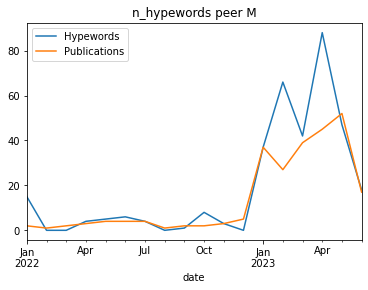

In [390]:
freq="M"

hype_time=hype_sentences.set_index("date").groupby(pd.Grouper(freq=freq))


hype_df=pd.DataFrame()
hype_df["Hypewords"]=hype_time["hype_n"].apply(lambda x: sum(x) if len(x)>0 else 0)
#hype_df["n"]=hype_time["hype_n"].apply(lambda x: len(x) if len(x)>0 else 0)

hype_df[hype_df.index>pd.datetime(2022,1,1)]["Hypewords"].plot(title=f"n_hypewords peer {freq}",legend=True)
df_publ[df_publ.index>pd.datetime(2022,1,1)]["Publications"].plot(legend=True)


In [238]:
hype_sentences["hype_ratio"].describe()


count    5807.000000
mean        0.000710
std         0.004262
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.111111
Name: hype_ratio, dtype: float64

In [216]:
hype_time=hype_sentences.set_index("date").groupby(pd.Grouper(freq='W'))
hype_time

In [663]:
from collections import Counter


keyWords="chatgpt,education,chatbot,university,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"
keyWords="education,chatbot,create,write,produce,answer,tool,human,skill,knowledge,bias,assignment,intelligence,artificial,test,evaluate,assessment,plagiarism"

keyWords=keyWords.split(",")
print(keyWords)

group=df.set_index("date").groupby(pd.Grouper(freq='M'))["NoStopwords"].sum()

Wordyear={}
Wordyear_exact={}
Wordyear_only={}
for i, row in group.iteritems():
    
    #print(i,row)
    if type(row)==list:
        
        ## filter ROW for interesting key-words:
        row=[i for i in row if i in keyWords]
        
        c=Counter(row).most_common(5)
        
        c_exact=[(i[0],i[1]/len(group)) for i in c]

        c=[(i[0],str(round(i[1]/len(group)*100,2))+"%") for i in c]
        c_only=[i[0] for i in c]


        Wordyear[str(i)]=c
        Wordyear_exact[str(i)]=c_exact
        Wordyear_only[str(i)]=c_only
        
        
        
    #print(c,"\n")
    
CountDF=pd.DataFrame.from_dict(Wordyear, orient='index').T


CountDF.T[CountDF.T.index>"2022-10-01"]

['education', 'chatbot', 'create', 'write', 'produce', 'answer', 'tool', 'human', 'skill', 'knowledge', 'bias', 'assignment', 'intelligence', 'artificial', 'test', 'evaluate', 'assessment', 'plagiarism']


,0,1,2,3,4
2022-10-31 00:00:00,"(knowledge, 19.39%)","(artificial, 5.1%)","(intelligence, 5.1%)","(chatbot, 1.02%)","(create, 1.02%)"
2022-11-30 00:00:00,"(chatbot, 3.4%)",None,None,None,None
2022-12-31 00:00:00,"(write, 7.82%)","(answer, 3.4%)","(artificial, 2.38%)","(intelligence, 2.38%)","(human, 2.38%)"
2023-01-31 00:00:00,"(tool, 21.77%)","(chatbot, 20.75%)","(education, 18.37%)","(human, 17.69%)","(intelligence, 15.31%)"
2023-02-28 00:00:00,"(chatbot, 148.3%)","(human, 135.03%)","(write, 37.07%)","(knowledge, 33.33%)","(bias, 23.13%)"
2023-03-31 00:00:00,"(answer, 74.15%)","(chatbot, 63.61%)","(write, 62.24%)","(create, 30.95%)","(education, 29.25%)"
2023-04-30 00:00:00,"(human, 40.48%)","(create, 31.97%)","(education, 21.43%)","(knowledge, 20.07%)","(intelligence, 13.61%)"
2023-05-31 00:00:00,"(intelligence, 29.59%)","(artificial, 28.57%)","(education, 26.19%)","(tool, 23.81%)","(write, 23.13%)"
2023-06-30 00:00:00,"(intelligence, 19.73%)","(artificial, 14.97%)","(education, 12.93%)","(human, 9.86%)","(assessment, 9.86%)"


In [450]:
CountDF=pd.DataFrame.from_dict(Wordyear_only, orient='index').T
CountDF.T[CountDF.T.index>"2022-10-01"]

,0,1,2,3,4
2022-10-31 00:00:00,knowledge,artificial,intelligence,create,chatbot
2022-11-30 00:00:00,chatbot,None,None,None,None
2022-12-31 00:00:00,write,answer,human,artificial,intelligence
2023-01-31 00:00:00,write,tool,answer,chatbot,human
2023-02-28 00:00:00,chatbot,human,write,knowledge,skill
2023-03-31 00:00:00,answer,chatbot,write,create,tool
2023-04-30 00:00:00,human,create,education,knowledge,intelligence
2023-05-31 00:00:00,education,intelligence,artificial,chatbot,write
2023-06-30 00:00:00,intelligence,artificial,education,human,write


In [ ]:
df=df.drop_duplicates("text_clean")

In [ ]:
df

In [453]:
#This cell allows to read the words before and after a search_word. You can change the searchword & the size of the context.
@interact(search_word="sustainable",words_before=(0,10),words_after=(0,10))
def text_context(column=["text_clean","pure_text","NoStopwords","AI_sentences"],search_word="education",words_before=1,words_after=1):
    df[column].dropna().apply(analysis.Keyword_context,search_word=search_word.lower(),context=(words_before,words_after))


interactive(children=(Dropdown(description='column', options=('text_clean', 'pure_text', 'NoStopwords', 'AI_se…

In [454]:
# WORD _GRAPH ANALYSIS

G=analysis.Word_NetworkGen(df,n=300,column="NoStopwords")
G2=analysis.CleanGraph(G,removeIsolates=True,minDegree=2,only_largest_component=True)
#G2=G
analysis.writeNetworkHTML(G2,view=False)
print("see the network: The_network.html")

[(('ai', 'ai'), 57972), (('chatgpt', 'chatgpt'), 39778), (('chatbot', 'chatbot'), 33439), (('de', 'de'), 23056), (('ai', 'datum'), 18629)]
Cleaning Graph to minimum Degree 2.
Nodes count:  43
Edges count:  144
see the network: The_network.html


In [459]:
nx.write_gexf(G2, "NoStopwords")

# Link Analysis 

In [658]:
import networkx as nx

df=pd.read_json("2023-06-06_Zotero_AI_nlp_en2.json")
links=df[["url","linkUrl"]].drop_duplicates(subset="url").explode("linkUrl")

In [659]:
def domain_From_url(url):
    if isinstance(url,str):
        domain=url.replace("https://","").replace("http://","").replace("www.","").split("/")[0].lstrip(".")
        domain=domain.rsplit("@",1)[-1].rsplit("%20",1)[-1]
        if domain.count(".")>1:
            domain=".".join(domain.rsplit(".",2)[-2:])

        if "." in domain:
            return domain
    
    


links["source"]=links.url.apply(domain_From_url)
links["target"]=links.linkUrl.apply(domain_From_url).reindex()

In [660]:
links=links.dropna(subset="target").dropna(subset="source")
links=links[~links["url"].apply(lambda x: "linkedin.com" in x)]
edgelist=(zip(links["source"], links["target"]))

links[links["source"]==None]
G = nx.from_edgelist(edgelist)
nx.write_gexf(G,"Links.gexf")

In [648]:
edgelist=(zip(links["source"], links["target"]))
edges=list(edgelist)

In [652]:
from collections import Counter
pd.DataFrame(Counter(edges).most_common(15))

,0,1
0,"(vu.nl, vu.nl)",229
1,"(tudelft.nl, tudelft.nl)",188
2,"(uu.nl, uu.nl)",171
3,"(utwente.nl, utwente.nl)",155
4,"(ru.nl, ru.nl)",128
5,"(tue.nl, tue.nl)",102
6,"(universiteitleiden.nl, universiteitleiden.nl)",92
7,"(wur.nl, wur.nl)",90
8,"(maastrichtuniversity.nl, maastrichtuniversity.nl)",86
9,"(eur.nl, eur.nl)",72


In [653]:
links=df.linkUrl.to_list()
links=[list(set(l))for l in links if type(l)==list]
links=[i for s in links for i in s if i!=None]
domains=[domain_From_url(i) for s in links for i in s if i!=None]

In [654]:

from collections import Counter
a_counter = Counter(links)
most_common = a_counter.most_common(15)
most_common

[('https://www.facebook.com/vuamsterdam', 128),
 ('https://www.youvisit.com/tour/vuamsterdam', 128),
 ('https://www.youtube.com/user/vrijeuniversiteit', 128),
 ('https://twitter.com/VUamsterdam', 128),
 ('https://www.instagram.com/vuamsterdam/', 128),
 ('https://www.linkedin.com/school/vrije-universiteit-amsterdam/', 128),
 ('https://vu.nl/en/alumni', 119),
 ('https://vu.nl/en/about-vu', 119),
 ('https://vu.nl/en/about-vu/divisions/university-library', 119),
 ('https://studiegids.vu.nl/en', 119),
 ('https://vu.nl/en/education', 119),
 ('https://vu.nl/en/research', 119),
 ('https://workingat.vu.nl/home', 119),
 ('https://vu.nl/en/about-vu/more-about/faculties-vrije-universiteit-amsterdam',
  119),
 ('https://vu.nl/en/education/professionals', 119)]

In [655]:
links=df.linkUrl.to_list()